- Daniella dijkdrent (23110112)
- Michelle Schijff (23111240)
- Alyssa Biesot (23140488)
- Syndey Nieuwenhuis (23130164)

# 1. Exploratieve Data Analyse

In [7]:
# Importeren van alle benodidge libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [8]:
# Importen van de test set
test = pd.read_csv('test.csv')
test

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,32840,52.0,0,0,97.32,21.8,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,45158,30.0,0,0,227.99,47.7,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,56105,26.0,0,0,113.28,24.4,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
3,3112,24.0,0,0,79.15,21.0,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False
4,35224,63.0,0,0,89.69,33.3,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8383,60672,24.0,0,0,77.54,25.0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
8384,25989,17.0,0,0,99.99,22.7,True,False,False,True,...,False,False,False,True,False,True,False,False,True,False
8385,34072,11.0,0,0,80.11,22.2,True,False,False,True,...,False,False,False,False,True,False,True,False,False,False
8386,32400,16.0,0,0,105.26,47.5,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False


In [9]:
# Importen van de train set
train = pd.read_csv('train.csv')
train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,9.0,0,0,109.80,14.5,False,True,False,True,...,False,False,False,True,True,False,False,False,False,0
33546,19648,47.0,0,0,88.61,30.8,True,False,False,False,...,False,True,False,False,False,True,False,False,False,0
33547,35550,3.0,0,0,89.68,16.2,True,False,False,True,...,False,False,False,True,True,False,False,False,False,0
33548,65453,56.0,1,0,82.44,27.8,True,False,False,False,...,False,False,False,False,False,True,False,False,True,0


###  1.1 beschrijvingen kolommen
- id : personen ID
- age: leeftijd persoon
- hypertension: of de persoon last heeft van hoge bloeddruk (1=ja, 0=nee)
- heart_disease: of de persoon last heeft van hartziekte(1=ja, 0=nee)
- avg_glucose_level: gemiddelde glucose level van persoon
- bmi: bmi van persoon
- gender_female: beschrijving van geslacht, True als de persoon een vrouw is, False als de persoon een ander geslacht heeft
- gender_male: beschrijving van geslacht, True als de persoon een man is, False als de persoon een ander geslacht heeft
- gender_other: gender_female: beschrijving van geslacht, True als de persoon zich met other identificeert, False als de persoon zich als man of vrouw identificeert.
- ever_married_no: beschrijving van als de persoon ooit getrouwd is geweest, True voor niet getrouwd, False voor wel getrouwd
- ever_married_yes: beschrijving van als de persoon ooit getrouwd is geweest, True voor wel getrouwd, False voor niet getrouwd
- work_type_govt: of de persoon wel of niet een baan bij de overheid heeft, True wel overheid baan, False geen overheid baan
- work_type_never_worked: of de persoon wel of geen baan heeft gehad/heeft, True voor nooit gewerkt, False voor wel gewerkt/werkend
- work_type_private: of de persoon wel of niet in de particuliere sector werkt, True voor wel in de particuliere sector, False voor niet
- work_type_self-employed: of de persoon wel of niet zelfstandig werkt, true voor wel zelfstandig, False voor niet zelfstandig
- work_type_children: of de persoon wel of niet met kinderen werkt, true voor werkt wel met kinderen, false voor werkt niet met kinderen
- residence_type_rural: als de persoon op het platteland woont, True voor wel op het platteland, False voor niet op het platteland
- residence_type_urban: als de persoon in de stad of het dorp woont, True voor wel, False voor niet
- smoking_status_formerly_smoked: als de persoon eerder heeft gerookt, True voor wel gerookt, False voor niet gerookt
- smoking_status_never_smoked: als de persoon nooit heeft gerookt, True voor nooit gerookt, False voor wel gerookt
- smoking_status_smokes: is de persoon momenteel aan het roken, True voor wel aan het roken, False voor niet aan het roken
- stroke: heeft de persoon een stroke gehad, True voor wel, False voor niet

### 1.2 basisstatistieken en datatypes

In [10]:
test.info()
train.info()
display(test.describe())
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8388 non-null   int64  
 1   age                             8388 non-null   float64
 2   hypertension                    8388 non-null   int64  
 3   heart_disease                   8388 non-null   int64  
 4   avg_glucose_level               8388 non-null   float64
 5   bmi                             8388 non-null   float64
 6   gender_Female                   8388 non-null   bool   
 7   gender_Male                     8388 non-null   bool   
 8   gender_Other                    8388 non-null   bool   
 9   ever_married_No                 8388 non-null   bool   
 10  ever_married_Yes                8388 non-null   bool   
 11  work_type_Govt_job              8388 non-null   bool   
 12  work_type_Never_worked          83

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,8388.000000,8388.000000,8388.000000,8388.000000,8388.000000,8388.000000
mean,37094.643777,41.935198,0.085002,0.043395,103.814890,28.620327
std,20955.196907,22.509673,0.278902,0.203758,42.639044,7.721361
min,4.000000,0.080000,0.000000,0.000000,55.000000,10.300000
25%,18877.750000,24.000000,0.000000,0.000000,77.010000,23.200000
50%,37490.000000,43.000000,0.000000,0.000000,91.320000,27.800000
75%,55290.250000,60.000000,0.000000,0.000000,111.665000,33.000000
max,72934.000000,82.000000,1.000000,1.000000,291.050000,80.200000


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


##  1.3 machine learning vereisten
- numeriek
    - kolommen 6 tot en met 20 staan nog niet in numerieke waardes en moeten dus worden veranderd in 0 en 1
- geen missende waarde
    - er zijn geen missende waarde 
- opgeslagen in dataframe of numpy array
    - data is opgeslagen in een dataframe

Hier maken we gebruik van een zelf gedefineerde functie om de niet numerieke waarden om te zetten in numerieke waarden 0 en 1.

In [11]:
# Aanmaken eigen functie om data numeriek te maken
# Voor de test set
def replace(df):
    for column in df.columns:
        if df[column].dtype == 'bool':
            df[column] = df[column].apply(lambda x: 1 if x else 0)
    return df
            
test_2 = replace(test)
display(test_2)
# Bron: Prompt 1, clarification worktype

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,32840,52.0,0,0,97.32,21.8,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,45158,30.0,0,0,227.99,47.7,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,56105,26.0,0,0,113.28,24.4,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,3112,24.0,0,0,79.15,21.0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,35224,63.0,0,0,89.69,33.3,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8383,60672,24.0,0,0,77.54,25.0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
8384,25989,17.0,0,0,99.99,22.7,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
8385,34072,11.0,0,0,80.11,22.2,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8386,32400,16.0,0,0,105.26,47.5,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [40]:
# Maken van numerieke waarden dataset van de train set
train_2 = replace(train)
display(train_2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,72295,75.0,1,0,215.17,48.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,26451,15.0,0,0,135.22,19.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,65210,47.0,0,0,64.89,28.2,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,69299,49.0,0,0,222.34,28.8,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,9.0,0,0,109.80,14.5,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
33546,19648,47.0,0,0,88.61,30.8,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
33547,35550,3.0,0,0,89.68,16.2,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
33548,65453,56.0,1,0,82.44,27.8,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


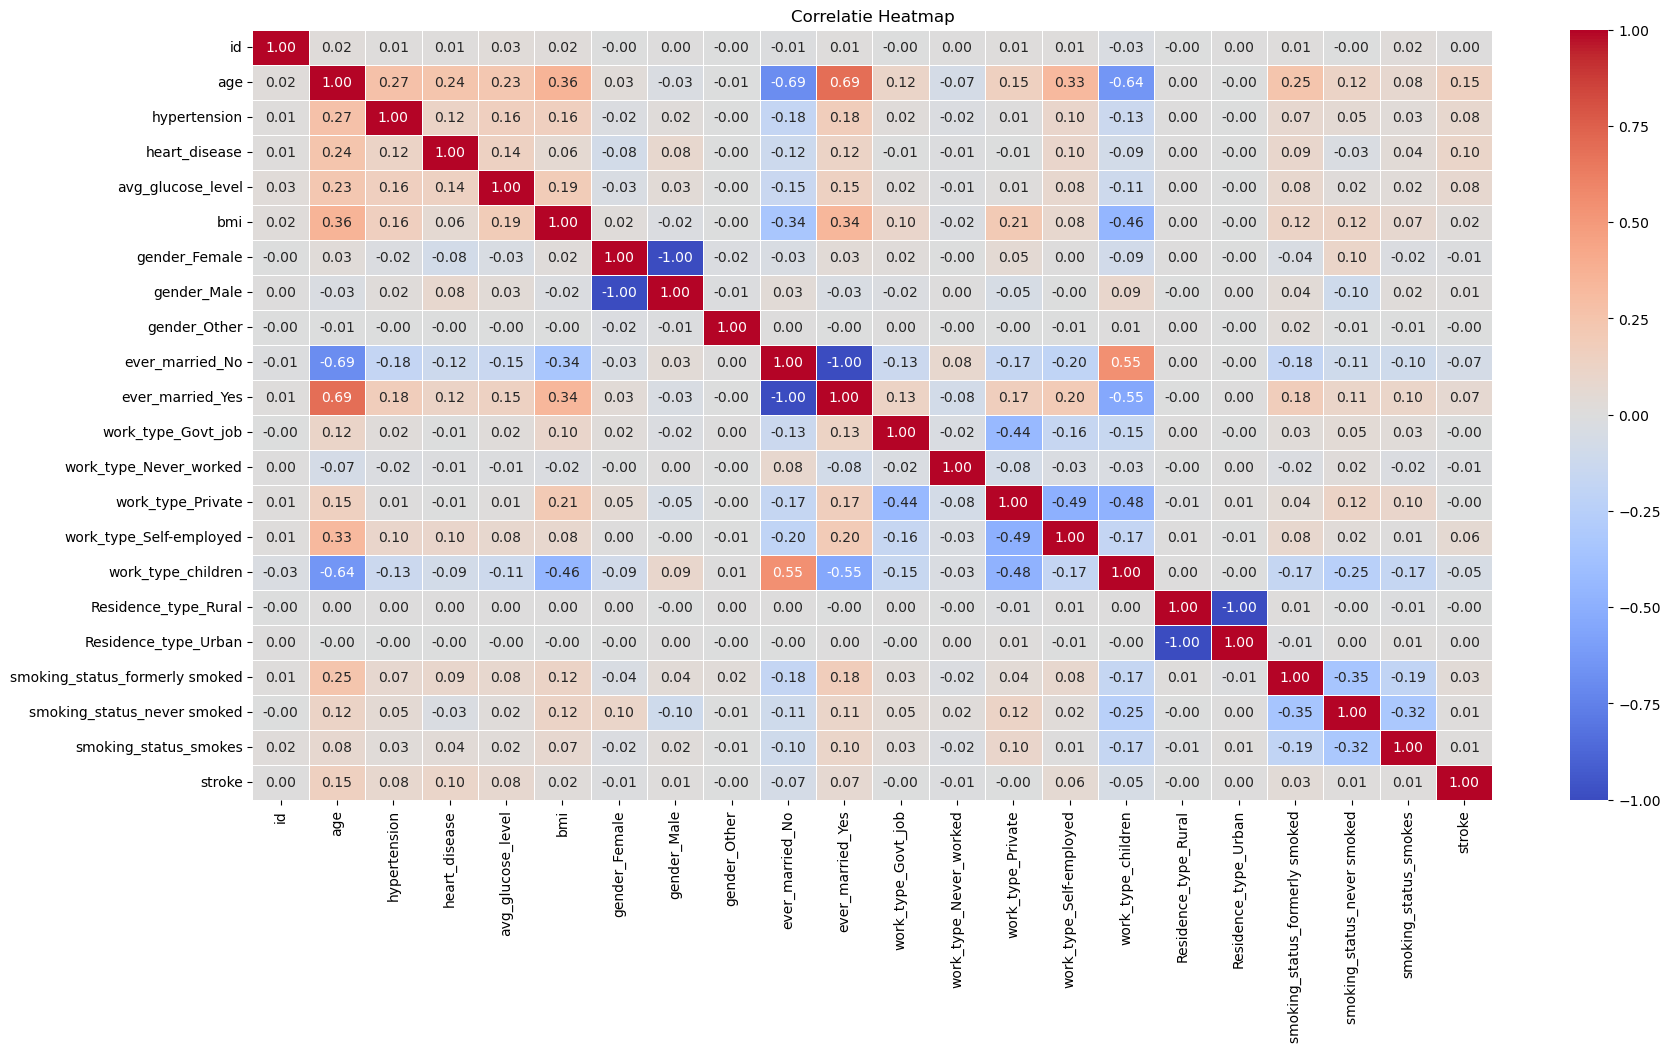

In [13]:
# Maken van een correlatie matrixs
correlaties = train_2.corr()
plt.figure(figsize=(20, 10)) 
sns.heatmap(correlaties, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlatie Heatmap')
plt.show()
# Bron: (wiskunde portfolio, jaar 1 semester 2)

In [14]:
correlaties = train_2.corr()

# Bekijk de correlaties met de 'stroke' kolom
correlatie_stroke = correlaties['stroke'].sort_values(ascending=False)
print(correlatie_stroke)

stroke                            1.000000
age                               0.148722
heart_disease                     0.104625
hypertension                      0.084019
avg_glucose_level                 0.076813
ever_married_Yes                  0.066403
work_type_Self-employed           0.061883
smoking_status_formerly smoked    0.034092
bmi                               0.020574
smoking_status_never smoked       0.009896
gender_Male                       0.008774
smoking_status_smokes             0.008489
Residence_type_Urban              0.002654
id                                0.000691
gender_Other                     -0.001673
Residence_type_Rural             -0.002654
work_type_Govt_job               -0.004439
work_type_Private                -0.004937
work_type_Never_worked           -0.008127
gender_Female                    -0.008727
work_type_children               -0.050728
ever_married_No                  -0.066403
Name: stroke, dtype: float64


Correlatie verwijst naar de mate waarin twee of meer variabelen op een systematische manier met elkaar samenhangen. Uit de gegevens blijkt dat de correlaties over het algemeen erg laag zijn. In de praktijk wordt vaak gesproken van een betekenisvolle correlatie bij waarden van 0,5 of hoger. In deze dataset is er echter geen sprake van zulke sterke verbanden. De hoogste correlatie die we waarnemen is slechts 0,15, wat erop wijst dat er weinig directe samenhang is tussen de variabelen en beroerte (stroke). Hierdoor moeten we voorzichtig zijn met het interpreteren van mogelijke oorzaken of voorspellers in deze dataset.

In [15]:
train2 = train_2.drop(columns=['gender_Other', 'work_type_Govt_job', 'work_type_Private', 'Residence_type_Rural', 'Residence_type_Urban'])
display(train2.head())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Never_worked,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,0,1,1,0,0,0,0,0,0,1,0
1,72295,75.0,1,0,215.17,48.0,1,0,0,1,0,1,0,0,1,0,0
2,26451,15.0,0,0,135.22,19.0,0,1,1,0,0,0,0,0,1,0,0
3,65210,47.0,0,0,64.89,28.2,0,1,0,1,0,1,0,0,1,0,0
4,69299,49.0,0,0,222.34,28.8,0,1,0,1,0,1,0,1,0,0,0


We hebben er voor gekozen om de kolommen 'gender_Other', 'work_type_Govt_job', 'work_type_Private', 'Residence_type_Rural', 'Residence_type_Urban' te droppen. Dit hebben we besloten op basis van de correlatie heatmap, we hebben gekeken naar de correlaties en als de correlaties afgerond op 2 decimalen 0.00 werd vonden we ze niet relevant genoeg.

###  1. 4 Scaling

##### wat wordt er bedoel met standaardiseren?
Met standaardiseren wordt er bedoeld, dat de waarden in de dataset allemaal op dezelfde schaal gezet worden. Tijdens het standaardiseren worden de waarden in alle kolommen op dezelfde schaal gezet of te wel, ze worden allemaal even groot gemaakt.   
   
Zo kan het zijn dat kolom 1 waarden heeft van 0 tot 10 en kolom 2 waarden heeft van 0 tot 100, omdat de waarden uit kolom 2 veel groter zijn kan het voorkomen dat het model ze zwaarder laat meewegen en een slechtere score geeft op ongeziene data.   

##### Is schalen gewenst?
Het standaardiseren van data kan gewenst zijn als het model dat gebruikt wordt, op basis van afstanden tussen punten of de wegingen van punten voorspellingen maakt. Door het standaardiseren zullen deze punten namelijk dichter op elkaar gaan liggen, en een beter model maken.   
   
Wij vinden dat standaardiseren nodig is voor deze dataset, omdat er een aantal kolommen zijn die waardes hebben die tientallen zijn zoals, bmi, average_glucose_level, age. Terwijl veel van onze kolommen bestaan uit 0 en 1, hierdoor zullen de eerder genoemde kolommen veel zwaarder meewegen dan ze in het echt waarschijnlijk doen. Omdat dit een grote invloed heeft op de uitkomsten van het model, hebben wij er voor gekozen dat het verstandig is om de data te schalen.   

In [16]:
# Importen, aanmaken en toepassen van de standardscaler
from sklearn.preprocessing import StandardScaler
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
train2[numerical_columns] = scaler.fit_transform(train2[numerical_columns])
print(train2[numerical_columns].head())

# Bron: (wiskunde portfolio, jaar 1 semester 2)

        age  avg_glucose_level       bmi
0 -0.525660          -0.949208  0.603791
1  1.476378           2.648741  2.492734
2 -1.193007           0.750898 -1.233751
3  0.230665          -0.918587 -0.051556
4  0.319645           2.818942  0.025544


In [17]:
# Laten zien van de nieuwe geschaalde train set
display(train2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Never_worked,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,-0.525660,0,0,-0.949208,0.603791,0,1,1,0,0,0,0,0,0,1,0
1,72295,1.476378,1,0,2.648741,2.492734,1,0,0,1,0,1,0,0,1,0,0
2,26451,-1.193007,0,0,0.750898,-1.233751,0,1,1,0,0,0,0,0,1,0,0
3,65210,0.230665,0,0,-0.918587,-0.051556,0,1,0,1,0,1,0,0,1,0,0
4,69299,0.319645,0,0,2.818942,0.025544,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,-1.459945,0,0,0.147481,-1.811999,0,1,1,0,0,0,1,0,0,0,0
33546,19648,0.230665,0,0,-0.355524,0.282543,1,0,0,1,0,0,0,0,0,0,0
33547,35550,-1.726883,0,0,-0.330125,-1.593550,1,0,1,0,0,0,1,0,0,0,0
33548,65453,0.631073,1,0,-0.501987,-0.102956,1,0,0,1,0,0,0,0,0,1,0


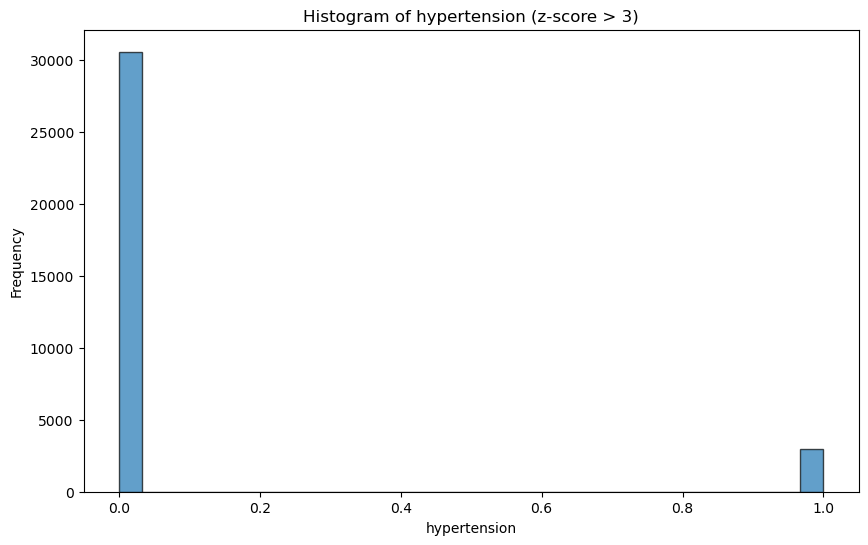

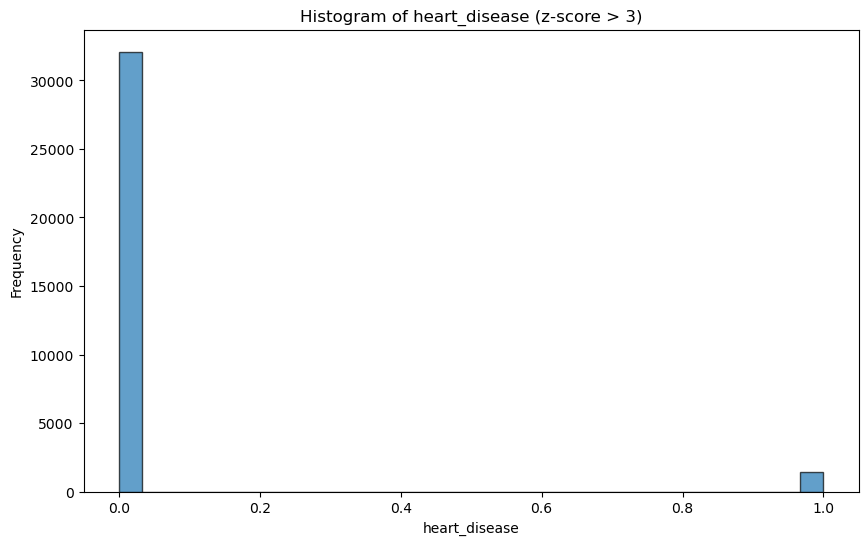

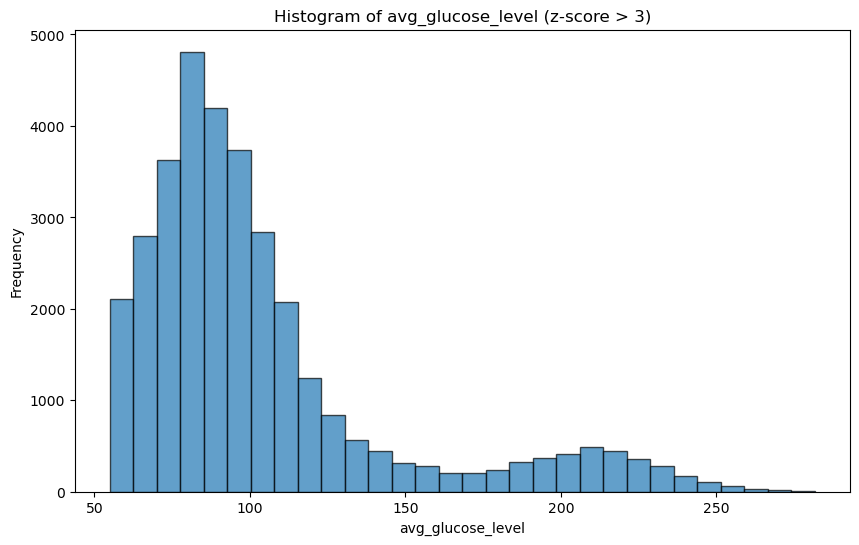

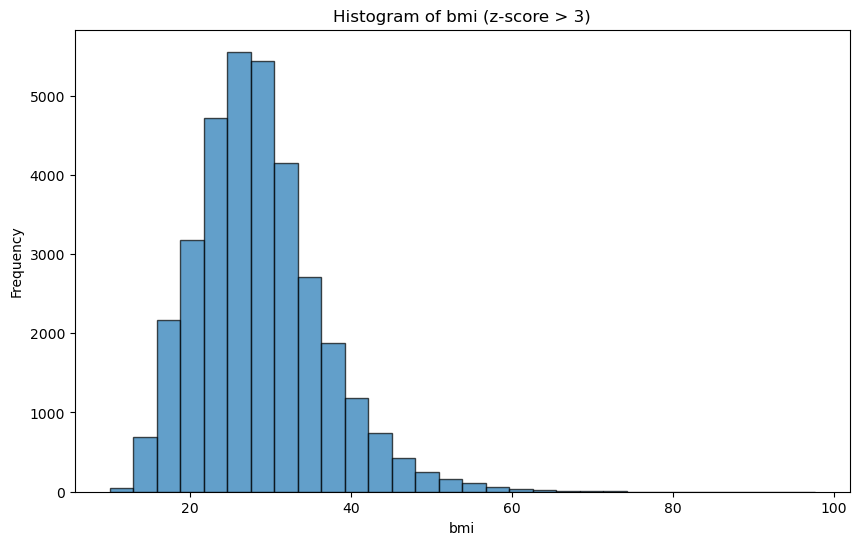

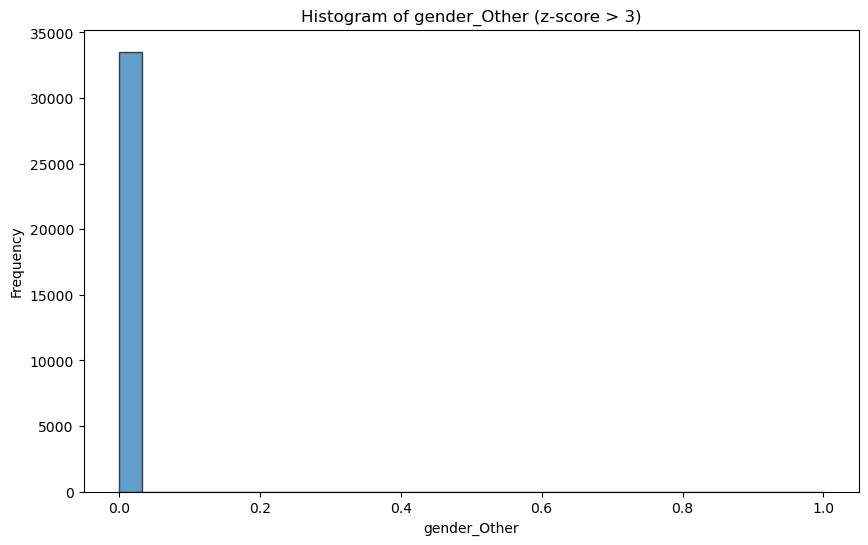

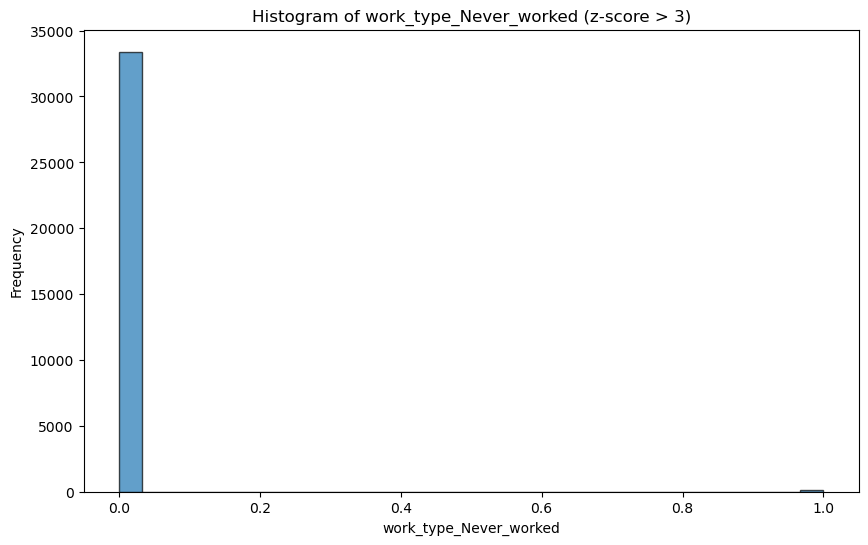

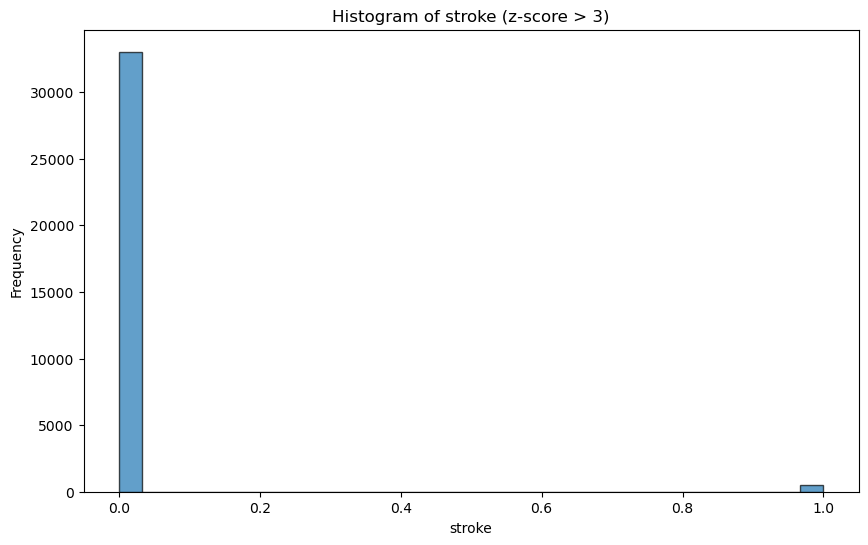

In [18]:
# Importeren van de z_score, en de toepassing van de z_score
from scipy.stats import zscore
z_scores = train.apply(zscore)
 
columns_to_plot = z_scores.columns[(z_scores.abs() > 3).any()]
 
# De z_scores plotten in histogrammen om te kijken naar outliers
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.hist(train[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column} (z-score > 3)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Bron: (wiskunde portfolio, jaar 1 semester 2)

### 1.5 Bevindingen:
Met behulp van de z-score gekeken naar de kolommen met een z-score groter dan 3, dit hebben door middel van histogrammen geplot en er is gekeken of er duidelijke outliers aanwezig zijn. Er blijken geen duidelijke outliers in onze dataset te zitten, hier hoeft dan ook niks meer mee gedaan te worden.

# 2. Evaluatie

### 2.1 Soorten metrics
Er zijn vier verschillende metrics die gebruikt kunnen worden om de prestatie van een classificatie model te krijgen.   
De vier metrics zijn:   
- *Accuracy*   
    De accuracy is het percentage correct geclassificeerde waarden van alle waarden in de dataset.   
    De formule: TP+TN / TP+TN+FP+FN   
- *Precision*   
    De precision geeft aan hoeveel voorspelde positieve waarden ook echt positief zijn   
    De formule: TP/TP+FP   
- *Recall*   
    De recall geeft aan hoeveel van de werkelijke positieve waarden ook echt positief voorspeld zijn door het model   
    De formule: TP/TP+FN   
- *F1-score*   
    De f1-score gebruik je wanneer je denkt dat precision en recall beide belangrijk zijn bij de beoordeling van de prestatie van het model   
    De formule: 2 * (Precision * Recall / Precision + Recall)   



### 2.2 Classificatie model

In [19]:
#splitsen van de data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = train2.drop('stroke',axis=1)
y = train2['stroke']
# In train en test data splitsen
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [20]:
# Aanmaken van de logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

# Voorspelling met de logistic regression
y_pred = lr.predict(X_test)

###  2.3 Maken van confusion matrix

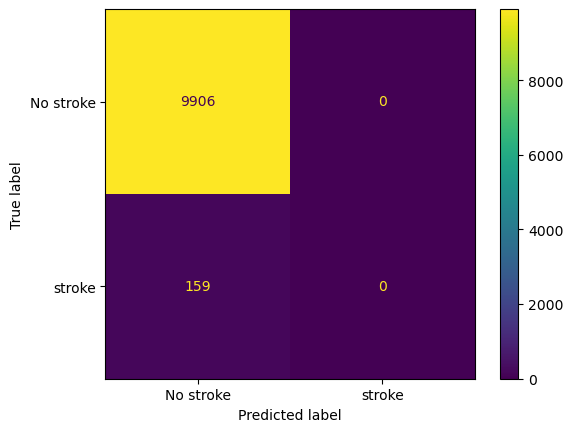

In [21]:
# Importeren van de confusion matrix, en toepassen en showen
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No stroke','stroke'])
cmd.plot()
plt.show()
# Bron: (Notebook Tree based 1, week 2)

### 2.4 Aanmaken van de metrics

In [22]:
# Maken van de tn, tp, fn, fp
TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

# Maken van de precision, recall en f1 score
precision = TP / (TP + FP) 
recall = TP / (TP + FN)
f1_score = 2 * ((precision * recall) / (precision+recall))

# Printen van f1-score en classification report
print(f1_score)
print(classification_report(y_test,y_pred))

# Bron: (Notebook Tree based 1, week 2)

nan
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9906
           1       0.00      0.00      0.00       159

    accuracy                           0.98     10065
   macro avg       0.49      0.50      0.50     10065
weighted avg       0.97      0.98      0.98     10065



C:\Users\Miche\AppData\Local\Temp\ipykernel_16588\1310519398.py:6: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)
C:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

### 2.5 Uitleg f1-score

Er is voor de f1-score gekozen omdat de dataset waarmee gewerkt wordt erg unbalanced is. Een unbalanced dataset is een dataset waarvan de waarde niet goed verdeeld zijn en er veel waarde in 1 categorie vallen. In de confusion matrix hierboven is goed te zien dat de dataset unbalanced is, zo zie je dat de TN, of te wel de categorie waar no stroke voor voorspeld wordt die ook echt no stroke is, bijna alle waarden bevat.    
   
Een unbalanced dataset kan er voor zorgen dat je model een hoge accuracy bereikt, maar een slechtere precision en recall geeft. Omdat de f1-score een combinatie is van de precision en recall en ook de mogelijkheid heeft om rekening te houden met unbalanced data is dit een goede metric om te gebruiken.

# 3. Modelleren en uitleg modellen

## 3.1 KNN

In [24]:
# Aanmaken van de SEED die nodig is voor de reproduceerbaarheid
SEED = 1
# Hier wordt de knn aangemaakt
knn = KNeighborsClassifier()

# Hier wordt de smote aangemaakt en toegepast voor de unbalanced dataset
smote = SMOTE(random_state=SEED)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Hier wordt de parameter grid aangemaakt voor de gridsearch
param_grid_reduced = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan'],
    'weights':['uniform','distance']
}

# Hier wordt de gridsearch toegepast
grid_search_reduced = GridSearchCV(knn, param_grid_reduced, cv=10, scoring='accuracy')
grid_search_reduced.fit(X_resampled, y_resampled)


# Vinden van de beste params, en printen van beste score
best = grid_search_reduced.best_params_
best_CV_score = grid_search_reduced.best_score_
print('Best CV accuracy :', best_CV_score)

# Vinden van het beste model, en printen van de score van het beste model
best_model_knn = grid_search_reduced.best_estimator_
print('Het beste model :', best_model_knn)
test_acc = best_model_knn.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc)

# Printen van de f1 score van het beste model
y_pred = best_model_knn.predict(X_test)
f1 = f1_score(y_test,y_pred) 
print( 'De f1 score van het beste model:', f1)


Best CV accuracy : 0.7545509353711688
Het beste model : KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
 De test accuracy van het beste model: 0.6190760059612519
De f1 score van het beste model: 0.0415


### 3.1.1 Hyperparameters
We hebben door middel van een gridsearch onderzocht bij welke hyperparameters het model het beste werkt. We hebben hier verschillende inputs gegeven voor de metric, n_neighbors, en de weights hyperparameters. Daarna hebben we via de functie .best_model_ gevraagd naar de hyperparameters die het beste resultaat geven. 
De uiteindelijke beste hyperparameters zijn:

- metric : 'Manhatten'
- n_neighbors : 3
- weights : 'distance'

Met deze hyperparameters kwamen op een f1-score van 0.04

### 3.1.2 Werking van het model knn
KNN bepaalt de afstand tussen een nieuw punt en alle punten in de trainingsset om de 'K' dichtstbijzijnde buren te vinden. De meest gebruikte afstandsformules zijn de **Euclidische afstand** en de **Manhattan afstand**.
 (Euclidean distance): Dit is de meest gebruikelijke maat om de rechte lijn tussen twee punten te berekenen. 
(Manhattan distance): Ook wel "taxicab"-afstand genoemd, deze meet de afstand door de absolute verschillen in coördinaten op te tellen. Deze afstand wordt vaak gebruikt wanneer je werkt met rasterachtige structuren of categorieën.

Bij **classificatie** neemt KNN de meerderheid van de klassen van de 'K' dichtstbijzijnde buren. 
Voor **regressie** berekent het de gemiddelde waarde van de buren.

####  **Waarom is standaardisatie van groot belang voor KNN?**
Omdat het KNN-model afhankelijk is van afstanden tussen punten, is **standaardisatie** essentieel. In datasets waarin kenmerken (features) verschillende schalen hebben, kan één kenmerk de afstandsberekening overhopen. Dit zou ertoe kunnen leiden dat het model een verkeerd idee krijgt over welke punten echt dichtbij liggen.


#### 3. **Welke hyperparameters geven de beste resultaten op de gekozen metric?**
In onze opdracht met de dataset gaf \(K = 5\) een nauwkeurigheid van 98.33%, wat als goed resultaat kan worden beschouwd.
  
Om de beste hyperparameters te vinden, gebruikten we een methode genaamd **Grid Search** met cross-validatie. Hierbij werden meerdere combinaties van \(K\) en afstandsmaten getest, en de beste combinatie werd gekozen op basis van de nauwkeurigheid.

#### 4. **Hoe werkt regularisatie voor KNN?**
Hoewel KNN niet een expliciete regularisatiemethode heeft zoals bijvoorbeeld Lasso bij lineaire modellen, kunnen er wel technieken worden gebruikt om overfitting te verminderen:

- **K-verhogen**: Een kleine \(K\) waarde kan ervoor zorgen dat het model te veel aandacht besteedt aan individuele voorbeelden, wat kan leiden tot overfitting. Door \(K\) te vergroten, wordt het model "gladder" en robuuster tegen ruis in de data.
  
- **Gewogen KNN**: In plaats van alle buren gelijk te behandelen, kun je de invloed van elk van de \(K\) buren wegen op basis van hun afstand tot het te voorspellen punt. Dichtere buren krijgen meer gewicht dan verder gelegen buren, wat het model robuuster kan maken.

## 3.2 Logistic Regression

In [25]:
!pip install nbconvert

In [26]:
# Aanmaken van een logistic regression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter = 1000, class_weight='balanced')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
 
# Maken van een parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}

# Toepassen van de gridsearch
grid_search_lr = GridSearchCV(lr, param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)
  
# Vinden van de beste params, en printen van beste score
best = grid_search_lr.best_params_
best_CV_score_lr = grid_search_lr.best_score_
print('Best CV accuracy :', best_CV_score_lr)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)

# Vinden van het beste model, en printen van de score van het beste model
best_model_lr = grid_search_lr.best_estimator_
print('Het beste model :', best_model_lr)
test_acc_lr = best_model_lr.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc_lr)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)

# Printen van de f1 score van het beste model
y_pred_lr = best_model_lr.predict(X_test)
f1_lr = f1_score(y_test,y_pred_lr) 
print( 'De f1 score van het beste model:', f1_lr)

C:\Users\Miche\mapvoornotebook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best CV accuracy : 0.7517564402810304
Het beste model : LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   solver='liblinear')
 De test accuracy van het beste model: 0.7469448584202683
De f1 score van het beste model: 0.09133071708883339


### 3.2.1 Hyperparameters
We hebben door middel van een gridsearch onderzocht bij welke hyperparameters het model het beste werkt. We hebben hier verschillende inputs gegeven voor de C, class_weight, en de solver hyperparameters. Daarna hebben we via de functie .best_model_ gevraagd naar de hyperparameters die het beste resultaat geven. 
De uiteindelijke beste hyperparameters zijn:

- class_weight : 'balanced
- C : 1
- solver : liblinear

Met deze hyperparameters kwamen op een f1-score van 0.091

### 3.2.2 logistic regression 
#### hoe werkt logistic regression
Logistic Regression is een classificatie-model waarmee een bineare, 0 of 1, uitkomst voorspeld wordt met behulp van meerdere onafhankelijke features(Shah, 2024). Door de imput features te fitten op de logistische functie, de sigmoid functie. De sigmoid functie wordt gebruikt om de kansen te berekenen met een kans >50 zal de uitkomst 1 zijn en bij een kans <50 zal de uitkomst 0 zijn(Shah, 2024).
de sigmoid functie:

$$
h_\theta(x) = \frac{1}{1 + e^{- (x)}}
$$

$$
X = \beta_0 + \beta_1 x_1 + \beta_n x_n
$$


#### Log-Loss

$$
-\frac{1}{N} \sum_{i=1}^{N} \left[ y_{\text{true}} \log(y_{\text{pred}}) + (1 - y_{\text{true}}) \log(1 - y_{\text{pred}}) \right]
$$

- de ytrue is 1 of 0
- ypred is de kans tussen 1 of 0
- N is het aantal data punten
- deze loss functie wordt gebruikt bij logistic regression, de log loss berekend hoe dichtbij de ypred bij de ytrue zit hoe verder van elkaar af hoe groter de loss
(Log_Loss, n.d.)
(brightspace logsistic regression slides, week 2)


#### Gradient Descent
bij de gradient descent gaat het om het optimaliseren van de parameters om de los te minimaliseren. dit wordt gedaan door eerst te kijken of er op een bepaald punt (X) sprake is van een positief of negatieve gradient. Daarna wordt de X aangepast met een stap in de tegenovergestelde richting, dus bij een negatieve gradient een stap in de positieve richting en andersom. van dit nieuwe punt de gradient bepalen negatief, positief of nul en dit herhalen tot de gradient 0 is.
$$
x_{\text{new}} = x_{\text{old}} - \alpha \frac{dy}{dx}
$$
(prompt 2. Gradient Descent Formule)

- x_new = de nieuwe X
- x_old = de oude x
- a = de learning rate, deze parameter besluit de stap grote
- dy/dx = de gradient / afgeleiden

(brightspace, lecture gradient descent week 4) 


#### regularisatie
- L1 regularisatie (lasso) gebruikt de absolute waarde van de coefficienten voor de Loss function
- L2 regularisatie (Ridge) gebruikt het kwadraat van de coefficienten voor de Loss function

regularisatie straft te grote coefficienten, waardoor het model aangemoedigd wordt een eenvoudigere oplossing te vinden. Hierdoor wordt overfitting tegengegaan vooral wanneer er beperkte gegevens zijn.

(brightspace lecture loss, metrics, underfitting, overfitting, week 2
datacamp: lineair classifiers in python; logistic regression)

####  parameters
hier wordt gebruik gemaakt van gridsearch en crossvalidation om de beste parameters voor dit model te vinden. er wordt gebruik gemaakt van de class_weight omdat er bij deze dataset sprake is van een unbalanced dataset, door gebruik te maken van de class-weight krijgen wij een meer betrouwbare output. de C is mate van regularisatie hoe lager de C hoe hoger de regularisatie. de liblinear hoort bij l1 regularisatie en de lbfgs hoort bij l2 regularisatie

## 3.3 SVM

In [ ]:
# bron: datacamp week 5

from sklearn.svm import SVC

# Aanmaken van de SMOTE
SEED = 1
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Maken van het svm
svm_model = SVC(random_state=SEED)

# Maken van de parameter grid
param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': [0.1, 0.01, 0.001], 
    'kernel': ['linear', 'rbf', 'poly']
}

# Maken en toepassen van de gridsearch
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

# Vinden van de beste params, en printen van beste score
best_svm_params = grid_search.best_params_
print('Best hyperparameters voor SVM met SMOTE:', best_svm_params)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)

# Vinden van het beste model, en printen van de score van het beste model
best_svm_model = grid_search.best_estimator_
print('Het beste model :', best_svm_model)
test_acc = best_svm_model.score(X_test, y_test)
print('Test accuratesse:', test_acc)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)

# Printen van de f1 score van het beste model
y_test_pred = best_svm_model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print('F1 score op testset:', f1_test)

### 3.3.1 Werking van het SVM-model
Support Vector Machines (SVM) kunnen zowel voor lineaire als niet-lineaire classificatie worden ingezet. Het hoofddoel van een SVM is het identificeren van een hypervlak dat de gegevens van verschillende klassen zo effectief mogelijk scheidt (GeeksforGeeks,2024 October 10). De positie van dit hypervlak wordt bepaald door de support vectors, de gegevenspunten die zich het dichtst bij de scheidingslijn bevinden. Het principe achter SVM is om een maximale marge te creëren tussen de gegevenspunten van de verschillende klassen, wat bijdraagt aan een betere generalisatie naar nieuwe, ongeziene data(GeeksforGeeks,2024 October 10).

### 3.3.2 wiskundige formules:

##### BESLISSINGSVAK
De wiskundige formule voor het beslissingsvlak in SVM ziet er als volgt uit(GeeksforGeeks, 2024 October 10):

$$f(x) = w^T \cdot x + b$$
Hierbij zijn:
- w, de gewichten die de richting van het scheidende hypervlak bepalen, Elk gewicht geeft aan hoe belangrijk de bijbehorende eigenschap is voor de classificatie
- x, de invoerdata,
- b, is een bias term. vertegenwoordigt de offset of afstand van het hypervlak vanaf de oorsprong langs de normaalvector
(GeeksforGeeks, 2024 October 10)
#### REKENVOORBEELD
Stel dat we na het trainen van ons SVM-model de volgende waarden hebben gekregen:
- w = [0.5, -0.4]
    - hier betekent w1=0.5 dat als de eerste eigenschap (bijvoorbeeld leeftijd) met één eenheid toeneemt, de uitkomst f(x) met 0.5 toeneemt.
    - w2=-0.4 betekent dat een toename van de tweede eigenschap (bijvoorbeeld hypertensie) met één eenheid de uitkomst f(x) met 0.4 verlaagt.
- b =-1
(GeeksforGeeks, 2024 October 10)
We willen de voorspelling maken voor een nieuw datapunt. Stel dat het nieuwe datapunt de volgende kenmerken heeft:
- Kenmerken (age, hypertension) = 𝑥new = [3,2]
    - Dit is de invoer van de nieuwe gegevens. Hier vertegenwoordigt 3 bijvoorbeeld de leeftijd en 2 de aanwezigheid van hypertensie.
(GeeksforGeeks, 2024 October 10)
de berekening wordt dan:
- f(xnew) = (0.5 * 3) + (-0.4 * 2) + (-1)
-         = 1.5 - 0.8 -1
-         = -0.3

Interpretatie: Omdat f(xnew) < 0, wordt dit datapunt geclassificeerd als behorend tot de negatieve klasse
<hr style="height: 2px; border: none; background-color: black;" />
(GeeksforGeeks, 2024 October 10)
#####  AFSTAND TUSSEN GEGEVENSPUNT EN BESLISSINGSGRENS

De afstand tussen een gegevenspunt x_i en de beslissingsgrens kan als volgt worden berekend:

$$
D_i = \frac{w^T X_i + B}{\| w \|}
$$

- waarbij ||w|| de Euclidische norm van de gewichtsvector w voorstelt. Euclidische norm van de normaalvector Wimaliseerd.
(GeeksforGeeks, 2024 October 10)
##### REKENVOORBEELD
we gebruiken hierbij dezelfde waardes van w en b als bij het rekenvoorbeeld bij het beslissingsvak.
1. Eerst moeten we de Euclidische norm van w berekenen:
$$
\| w \| = \sqrt{(0.5)^2 + (-0.4)^2} = \sqrt{0.25 + 0.16} = \sqrt{0.41} \approx 0.64
$$
    - De Euclidische norm van 𝑤 geeft een maat voor de 'lengte' van de vector. Een kleinere norm betekent dat het hypervlak dichter bij de oorsprong ligt. Het is ook een maat voor de schaal van de gewichten; hoe groter de norm, hoe steiler het hypervlak en hoe minder marge er is tussen de klassen.
2. Nu kunnen we D berkenen
D = -0.3 / 0.64 = -0.47
- De waarde −0.47 betekent dat het punt redelijk dicht bij de beslissingsgrens ligt, wat suggereert dat het punt niet ver verwijderd is van de classificatiegrens, en dat er mogelijk een onzekerheid is in de classificatie.
(GeeksforGeeks, 2024 October 10)
### 3.3.3 Kernel en de Kernel Trick

De kerneltruc is een techniek die gebruikt wordt in Support Vector Machines (SVM) om niet-lineaire gegevens te classificeren met een lineaire classificator(GeeksforGeeks,2024 May 23). Door een kernelfunctie toe te passen, kunnen SVM's gegevens impliciet omzetten naar een hogere-dimensionale ruimte(GeeksforGeeks,2024 May 23). Hier kan een lineaire scheidingslijn (hypervlak) worden gebruikt om de klassen van elkaar te scheiden(GeeksforGeeks,2024 May 23). Dit is computationeel efficiënt, omdat het voorkomt dat de coördinaten in deze hogere ruimte direct moeten worden berekend(GeeksforGeeks,2024 May 23).

##### SOORTEN KERNELFUNCTIES:

Er kunnen verschillende kernelfuncties worden gebruikt, die elk geschikt zijn voor verschillende typen data verdelingen(GeeksforGeeks,2024 May 23):

- Lineaire kernel : Er is geen toewijzing nodig, omdat ervan wordt uitgegaan dat de gegevens lineair scheidbaar zijn.
- Polynomiale kernel : brengt invoer over naar een polynomiale featureruimte, waardoor de classificator beter in staat is interacties tussen features vast te leggen. Dit is handig voor datasets met niet-lineaire relaties.
- Radiale basisfunctie (RBF)-kernel : Ook bekend als de Gaussiaanse kernel. Deze kernel is handig voor het vastleggen van complexe regio's door rekening te houden met de afstand tussen punten in de invoerruimte. De RBF-kernel is vaak de beste keuze wanneer de vorm van de beslissingsgrens onbekend is.
- Sigmoid Kernel : bootst het gedrag van neurale netwerken na door een sigmoïde functie als kernel te gebruiken.

##### HOE WERKT DE KERNEL-TRUC
De kerneltruc werkt door gebruik te maken van het inwendige product van vectoren. In Support Vector Machines (SVM's) speelt dit een belangrijke rol bij het nemen van beslissingen, waarbij normaal gesproken de dotproducten van vectoren in de oorspronkelijke gegevensruimte worden gebruikt(GeeksforGeeks,2024 May 23). De kernelfuncties vervangen deze dotproducten door een niet-lineaire functie, die de berekeningen uitvoert alsof ze plaatsvinden in een hogere-dimensionale ruimte(GeeksforGeeks,2024 May 23). Het voordeel hiervan is dat je niet daadwerkelijk de coördinaten in die hogere dimensie hoeft te berekenen, wat zowel tijd als rekenkracht bespaart(GeeksforGeeks,2024 May 23).

De kerneltruc kan als volgt worden uitgedrukt(GeeksforGeeks,2024 May 23):

$$
K(x, y) = \phi(x) \cdot \phi(y)
$$


waarbij 𝑥 en y, vectoren zijn in de oorspronkelijke invoerruimte en 𝜙 de functie is die naar de hogere-dimensionale ruimte toewijst(GeeksforGeeks,2024 May 23).

##### CONCLUSIE
De kerneltruc vergroot de veelzijdigheid en kracht van SVM, waardoor ze zeer geschikt zijn voor diverse classificatietaken. Door de verwerking van niet-lineaire gegevens mogelijk te maken, opent het nieuwe mogelijkheden voor SVM-toepassingen in verschillende domeinen(GeeksforGeeks,2024 May 23). Naarmate rekenkundige technieken verbeteren, zal het gebruik van kernel functies SVM's waarschijnlijk nog gebruikelijker en effectiever worden voor het oplossen van complexe problemen in de praktijk(GeeksforGeeks,2024 May 23).


### 3.3.4 loss function

De loss functie SVM is cruciaal voor het optimaliseren van het model. Deze functie meet hoe goed het model presteert in het classificeren van de gegevens. Voor een SVM kunnen we verschillende verliesfuncties gebruiken, maar de meest voorkomende is de hinge loss(GeeksforGeeks, 2024 June 7).

#### HINGE LOSS FUNCTIE
De hinge loss is ontworpen om een marge tussen de klassen te waarborgen en is als volgt gedefinieerd(GeeksforGeeks, 2024 June 7):

$$
L(y, f(x)) = \max(0, 1 - y \cdot f(x))
$$


Hierin zijn:

- y de werkelijke klasse van de data (bijvoorbeeld +1 of -1 voor binaire classificatie).
- f(x) de voorspelling van het model, meestal gegeven door het hypervlak.
(GeeksforGeeks, 2024 June 7)

#### UITLEG VAN DE HINGE LOSS
- Marges: Hinge loss waarborgt een marge tussen de klassen. Als een datapunt correct is geclassificeerd en meer dan 1 eenheid van de scheidingslijn ligt, is de verliesfunctie 0(GeeksforGeeks, 2024 June 7).
- Fouten en Marges: Bij een verkeerde classificatie of als het datapunt binnen de marge ligt (y⋅f(x)<1), is de loss positief, wat aangeeft dat er een straf is voor de fout(GeeksforGeeks, 2024 June 7).
- Vergelijking met andere verliesfuncties: In vergelijking met andere verliesfuncties zoals de mean squared error, is de hinge loss minder gevoelig voor grote fouten, omdat het alleen bestraft als de classificatiefout binnen de marge valt. Dit kan leiden tot robuustere modellen(GeeksforGeeks, 2024 June 7).

#### DOEL VAN DE OPTIMALISATIE

Het doel is om de parameters w en b te optimaliseren zodanig dat de hinge loss over alle trainingsdata wordt geminimaliseerd.
Dit wordt vaak gecombineerd met een regularisatieterm om overfitting te voorkomen, wat resulteert in de volgende geoptimaliseerde functie(GeeksforGeeks, 2024 June 7):
$$
\min \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{N} L(y_i, f(x_i))
$$
Hierbij is:

- ∥𝑤∥^2 de regularisatieterm die ervoor zorgt dat de gewichten niet te groot worden(GeeksforGeeks, 2024 June 7).
- C een hyperparameter die de balans bepaalt tussen het vergroten van de marge en het verminderen van fouten tijdens het trainen van het model(GeeksforGeeks, 2024 June 7).
- N het aantal trainingsvoorbeelden(GeeksforGeeks, 2024 June 7).


### 3.3.5 regularisatie

Vormen van regularisatie: Er zijn verschillende vormen van regularisatie die van toepassing zijn op het SVM-model, elk met hun eigen wiskundige formulering en effecten:

##### L2-REGULARISATIE

- Formule: De regularisatieterm wordt aan de verliesfunctie toegevoegd als(GeeksforGeeks, 2024 June 7): 

$$ \frac{1}{2} \|w\|^2 $$ 
- Effect: Dit corrigeert grote gewichten en helpt overfitting te voorkomen. Het leidt tot een model waarbij de gewichten gelijkmatig verdeeld zijn, wat gunstig is in het geval van sterk samenhangende kenmerken en helpt bij het behouden van alle features(GeeksforGeeks, 2024 June 7).

##### L1-REGULARISATIE:

- Formule: De regularisatieterm wordt toegevoegd als:$$ \lambda \|w\|_1 $$ ,waarbij 𝜆 de regularisatieparameter is en ∥𝑤∥1 de som van de absolute waarden van de gewichten is(GeeksforGeeks, 2024 June 7).
- Effect: Dit heeft de neiging om sommige gewichten op precies nul te zetten, wat leidt tot een sparsity-effect(GeeksforGeeks, 2024 June 7). Hierdoor worden irrelevante features genegeerd, wat de interpretatie van het model vergemakkelijkt en de generalisatie kan verbeteren(GeeksforGeeks, 2024 June 7).

##### INVLOED VAN DE HYPERPARAMETER C
- Hoge C: Het model probeert elke fout in de trainingsdata te vermijden, wat kan leiden tot overfitting. Dit resulteert in een strakke margescheiding(GeeksforGeeks, 2024 June 7).
- Lage C: Het model accepteert meer fouten in de trainingsdata, wat leidt tot een bredere marge. Dit kan de generalisatie van het model verbeteren(GeeksforGeeks, 2024 June 7).

## 3.4 Decision Tree

In [28]:
# Maken van standaard random_state zodat het reproduceerbaar is
SEED = 1

# Maken van de DecisionTreeClassifier, met een class_weight
dt = DecisionTreeClassifier(random_state=SEED, class_weight='balanced')

# Maken van de parameter grid
param_grid = {'max_depth': [3, 4, 5,6],
              'min_samples_leaf': [0.02, 0.04, 0.06, 0.08, 0.1],
              'max_features': [0.2, 0.4, 0.6, 0.8]}

# Grid search uitvoeren
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy' ,n_jobs=-1)

# fitten van de grid
grid_dt.fit(X_train,y_train)

# Vinden van de beste params, en printen van beste score
best = grid_dt.best_params_
best_CV_score = grid_dt.best_score_
print('Best CV accuracy :', best_CV_score)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)

# Vinden van het beste model, en printen van de score van het beste model
best_model_dt = grid_dt.best_estimator_
print('Het beste model :', best_model_dt)
test_acc = best_model_dt.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)

# Printen van de f1 score van het beste model
y_pred = best_model_dt.predict(X_test)
f1 = f1_score(y_test,y_pred) 
print( 'De f1 score van het beste model:', f1)

# Bron: (F1_Score, n.d.)

Best CV accuracy : 0.7725764452305994
Het beste model : DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=0.6,
                       min_samples_leaf=0.02, random_state=1)
 De test accuracy van het beste model: 0.8377545951316443
De f1 score van het beste model: 0.11681990265008113


### 3.4.1 Hyperparameters

We hebben door middel van een gridsearch onderzocht bij welke hyperparameters het model het beste werkt. We hebben hier verschillende inputs gegeven voor de max_depth, min_samples_leaf, en de max_features hyperparameters. Daarna hebben we via de functie .best_model_ gevraagd naar de hyperparameters die het beste resultaat geven. 
De uiteindelijke beste hyperparameters zijn:

- class_weight : 'balanced
- max_depth : 4
- max_features : 0.6
- min_samples_leaf : 0.02

Met deze hyperparameters kwamen op een f1-score van 0.116

### 3.4.2 Werking van Decision Tree

Een decision Tree start met de wortel, hier ziet alle data van de dataset in. Deze data zal gesplits worden op basis van een feature die de grootste information gain krijgt(Datacamp,Classification and Regression Trees - Classification Tree Learning, n.d.). Deze data gaat naar een node, elke node heeft weer zijn eigen feature voorwaardes en zijn eigen information gain, ook hier probeerd het model de information gain zo groot mogelijk te maken(Datacamp,Classification and Regression Trees - Classification Tree Learning, n.d.). Deze splitsing van de data blijft doorgaan tot een node alle data goed voorspeld heeft en er geen splitsingen meer te maken zijn, dit wordt ook wel de leaf genoemd(Datacamp,Classification and Regression Trees - Classification Tree Learning, n.d.). Als er bij een node een 0 staat dan weet je dat alle data in de goede categorie zit en dat het een leaf is geworden(Datacamp,Classification and Regression Trees - Classification Tree Learning, n.d.).

Hoe complex je model is hangt af van de max_depth, dit is een parameter die aangeeft hoeveel lagen er van de boom zijn. Dit tellen ze van de root tot de leafs. Hoe groter de max_depth hoe complexer het model, maar dit kan ook tot overfitting leiden.

### 3.4.3 splitscriteria 

Bij elke node bepaald de decision tree welk kenmerk erg gebruikt wordt om de data te splitsen. Er zijn verschillende criteria die je kan gebruiken bij een decision tree:

- Entropy:
Bij de entropy wordt er gekeken hoeveel onzekerheid er nog is bij elke splitsing. De decision tree zal dan ook proberen het feature te kiezen die de laagste entropy waarde geeft (GeeksforGeeks, 2024). Hoe lager de waarde, hoe minder de onzekerheid, wat betekent dat het model er zeker van is dat de waarden goed geclassificeerd zijn (ChatGPT,2024,Prompt1:Entropie en besluitbomen). Omdat alle waarden bij de leaf van de decision tree goed geclassificeerd zijn, is de entropy daar 0.
     
- Gini-index:   
Bij de Gini-index kijkt de decision tree welke feature er gebruikt moet worden om een zo laag mogelijke gini-index te krijgen.De gini-index kijkt namelijk hoe homogeen de waarden zijn voorspeld, oftewel hoe goed het model de waarden in 1 keer de juiste classificatie heeft gegeven (GeeksforGeeks, 2024). Dit betekent dat je een lage gini-idnex waarde wil hebben, omdat dit aangeeft dat er weinig fouten gemaakt zijn. Omdat alle waarden bij de leaf goed voorspeld zijn, zal de gini-index daar ook 0 zijn.


### 3.4.4 Pruning

Pruning is een techniek waarmee je een model kan versimpelen, door middel van het verwijderen van branches. De branches die verwijderd worden, bevatten geen informatie die bealngrijk is om de data mee te kunnen classificeren(GeeksforGeeks, 2024 April 10). Door het verwijderen van branches versimpel je het model, en dit kan er voor zorgen dat je overfitting voorkomt. Waar wel op gelet moet worden, is dat dit niet te veel gedaan wordt, en ook niet op te simpele modellen gedaan wordt. Als dit wel gedaan wordt, kan het zijn dat je model juist gaat underfitten dan overfitten omdat het niet meer genoeg heeft om mee te trainen(Ravindran, 2023 January 31).   


## 3.5 Ensembles

### 3.5.1 Technieken voor de unbalanced dataset

#### SMOTE
SMOTE is een van de technieken die wij hebben toegepast op onze modellen, om het model beter te laten werken met de unbalanced dataset. SMOTE staat voor 'Synthetic Minority Over-Sampling Technique'(GeeksforGeeks,2024 May 3) en het is een techniek waarbij de kleinste groep waarden even groot gemaakt wordt als de grootste groep waarden. Hierdoor komt er een betere balans in de dataset.(GeeksforGeeks,2024 May 3)
SMOTE doorloopt een paar stappen om er voor te zorgen dat de dataset minder unbalanced is:
1. Er wordt onderzocht wat de kleinste groep is in de dataset
2. Dan kijkt smote naar de k-nearest neighbor die het model kan vinden
3. Daarna wordt er voor elk punt in de minderheidsklasse de k-nearest neighbor gevonden en wordt er op basis van die waarde een nieuw data punt aangemaakt.
4. de default setting van smote zorgt ervoor dat er even veel waarden in de originele minderheidsklasse zal komen als in de originele grootste klasse.
5. Dit process kan herhaald worden als er meerdere minderheidsklassen zijn.
6. De dataset is na dit hele proces minder tot iet unbalanced.   
(GeeksforGeeks,2024 May 3)


#### Random under sampler
Een andere techniek die wij gebruikt hebben is de RandomUnderSampler. Dit is een techniek die waarden uit de meerderheidsklasse verwijderd om die klasse even groot te maken als de minderheidsklasse(GeeksforGeeks, 2024 March 18). Hierdoor zijn de klassen even groot en zal de dataset minder unbalanced zijn. Een nadeel van deze techniek is wel dat je veel data kan verliezen, waardoor je model nog steeds geen goede resultaten zal leveren.


#### class_weights
wanneer er sprake is van een unbalanced dataset kan er gebruik worden gemaakt van class_weights, met behulp van de class_weights kunnen er hogere weights gegeven worden aan de minority class en lagere weights aan de majority class(Abhinav, 2023 August 9). Hierdoor geeft het model meer aandacht aan de minority class.
 
stappen van class_weights
1. unbalance identificeren
2. de class weights berekenen
3. de class weights implementeren
4. model trainen
5. resultaten bekijken   
(Abhinav, 2023 August 9)
 

## 3.6 Random Forest

In [29]:
# Aanmaken van de smote voor de unbalanced dataset
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) #(GeeksforGeeks,2024 May 3)


# Aanmaken van de parameter grid
param_grid = {
    'n_estimators': [10,20,30],         
    'max_depth': [5, 6, 7],            
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4]           
}

# Aanmaken van de RandomForest
randomforest = RandomForestClassifier(random_state=SEED)

# Maken en uitvoeren van de gridsearch
grid_search_rf = GridSearchCV(estimator=randomforest, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Het fitten van de gridsearch
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Vinden van de beste params, en printen van beste score
best = grid_search_rf.best_params_
best_CV_score = grid_search_rf.best_score_
print('Best CV accuracy :', best_CV_score)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Vinden van het beste model, en printen van de score van het beste model
best_model_rf= grid_search_rf.best_estimator_
print('Het beste model :', best_model_rf)
test_acc = best_model_rf.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Printen van de f1 score van het beste model
y_pred = best_model_rf.predict(X_test)
f1 = f1_score(y_test,y_pred) 
print( 'De f1 score van het beste model:', f1)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best CV accuracy : 0.9150115641767792
Het beste model : RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=30, random_state=1)
 De test accuracy van het beste model: 0.8728266269249876
De f1 score van het beste model: 0.07246376811594203


In [30]:
# Gebruiken van een ander model voor de unbalanced dataset
# Gebruiken van de RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X_train, y_train.ravel()) #(GeeksforGeeks, 2024 March 18)

# Aanmaken van de parameter grid
param_grid = {
    'n_estimators': [10,20,30],         
    'max_depth': [5, 6, 7],            
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4]           
}

# Aanmaken van de RandomForest
randomforest = RandomForestClassifier(random_state=SEED)

# Aanmaken van de 2de gridsearch
grid_search_rf2 = GridSearchCV(estimator=randomforest, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fitten van de 2de gridsearch
grid_search_rf2.fit(X_resampled, y_resampled)

# Vinden van de beste params, en printen van beste score
best = grid_search_rf2.best_params_
best_CV_score = grid_search_rf2.best_score_
print('Best CV accuracy :', best_CV_score)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Vinden van het beste model, en printen van de score van het beste model
best_model_rf2= grid_search_rf2.best_estimator_
print('Het beste model :', best_model_rf2)
test_acc = best_model_rf2.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Printen van de f1 score van het beste model
y_pred = best_model_rf2.predict(X_test)
f1 = f1_score(y_test,y_pred) 
print( 'De f1 score van het beste model:', f1)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best CV accuracy : 0.7948910880052334
Het beste model : RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=20, random_state=1)
 De test accuracy van het beste model: 0.7048186785891704
De f1 score van het beste model: 0.08443759630200308


### 3.6.1 Hyperparameters
We hebben door middel van een gridsearch onderzocht bij welke hyperparameters het model het beste werkt. We hebben hier verschillende inputs gegeven voor de max_depth, min_samples_leaf,min_samples_split, en de n_estimators hyperparameters. Daarna hebben we via de functie .best_model_ gevraagd naar de hyperparameters die het beste resultaat geven. 
De uiteindelijke beste hyperparameters zijn:

- max_depth : 7
- min_samples_split : 10
- n_estimator : 30
- min_samples_leaf : 0.02

Met deze hyperparameters kwamen op een f1-score van 0.072

### 3.6.2 Random Forest Classifier – Werking

#### Bootstrap
Bootstrap Aggregation (Bagging): In plaats van één beslissingsboom te gebruiken, traint Random Forest meerdere beslissingsbomen. Elke boom wordt getraind op een andere willekeurige subset van de originele dataset, door middel van **bootstrapping**, dat is het willekeurig selecteren van data met vervanging (Brownlee, J. 2016). er word een renadom feature selectie gedaan, bij splitsing in een boom kiest het model een random subset van features (Brownlee, J. 2016). Dit voorkomt dat de bomen allemaal op de zelfde manier worden getraind wat diversiteit vergroot en overfitting vermindert (Brownlee, J. 2016). 
Nadat elke boom is getraind, voorspellen ze onafhankelijk van elkaar. Bij **classificatie** wordt de uiteindelijke voorspelling bepaald door meerderheidsstemming. een belangrijk voordeel van forest classification is dat de bomen **parallel** kunnen worden getraind (Brownlee, J. 2016). elke boom is onafhankelik van de andere worden gebouwd en dus gelijktijdig kan worden getraind. Dit maakt Random Forest relatief snel in vergelijking met boosting-methoden, die sequentieel leren (Brownlee, J. 2016).


Snelle **trainingstijd**: Door de parallelle structuur traint Random Forest relatief snel, zeker wanneer de dataset groot is.
Robuust tegen overfitting: door bagging en random feature selectie wordt overfitting verminderd (Brownlee, J. 2016).
Goede prestaties op gebalanceerde datasets: Werkt goed als beide klassen voldoende vertegenwoordigd zijn. Bij ongebalanceerde datasets kan het model moeite hebben met het voorspellen van de minderheidsklasse (Brownlee, J. 2016).

#### Hyperparameters
Belangrijke Hyperparameters van Random Forest
Bij het gebruik van het Random Forest-model hebben we een paar belangrijke instellingen gekozen om het model zo goed mogelijk te laten werken, vooral omdat we een scheve dataset hebben met veel meer "niet-stroke" gevallen dan "stroke" gevallen.

Om te beginnen hebben we gekeken naar het aantal bomen dat het model gebruikt, dit noemen we de **n_estimators** (Bagging and Random Forests - Random Forests (RF), n.d.). We hebben verschillende aantallen getest, zoals 50, 100, en 200 bomen, om te zien bij welke hoeveelheid we de beste resultaten krijgen zonder dat het te lang duurt om te trainen (Bagging and Random Forests - Random Forests (RF), n.d.).

Vervolgens hebben we de **max_depth** ingesteld, wat bepaalt hoe diep elke het mag gaan. Als een het te diep gaat, kan hij te veel details van de trainingsdata leren, waardoor hij slecht wordt in het voorspellen van nieuwe data. We testen verschillende dieptes om ervoor te zorgen dat het model goed generaliseert en niet alleen maar de trainingsdata perfect leert.

We de **min_samples_split** en **min_samples_leaf** aangepast. Dit bepaalt hoeveel data er minimaal nodig is om een knoop in de boom te splitsen, en hoeveel data er in een bladknoop moet zitten (Bagging and Random Forests - Random Forests (RF), n.d.).

Tot slot is de **class_weight** heel belangrijk voor onze dataset. Omdat er veel meer "niet-stroke" dan "stroke" gevallen zijn, zou het model geneigd zijn om altijd "niet-stroke" te voorspellen. Door de class_weight op 'balanced' te zetten, hebben we het model zo ingesteld dat het fouten op de minderheidsklasse, in dit geval "stroke", zwaarder laat wegen. Hierdoor krijgt het model meer aandacht voor het herkennen van strokegevallen, wat voor ons de belangrijkste focus is.

## 3.7 Gradient Boosted Decistion Tree

In [19]:
!pip install --upgrade imbalanced-learn

In [31]:
# Maak de Gradient boosting classifier aan
gb = GradientBoostingClassifier(random_state=SEED)

# SMOTE gebruiken voor de unbalanced dataset
smote = SMOTE(random_state=SEED)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) #(GeeksforGeeks,2024 May 3)


# Kijk naar de mogelijke parameters voor de gb
gb.get_params()

# Maak de parameter grid aan voor de grid search
params = {'max_depth':[3,4,5,6],
         'n_estimators':[5,10,15,20],
         'max_features': [0.2,0.4,0.6],
         'min_samples_leaf': [0.02,0.04,0.06,0.08]}

# Maak de gridsearch aan
grid_gb = GridSearchCV(estimator=gb, param_grid=params, cv=10, scoring='accuracy' ,n_jobs=-1)

# Fit de grid_gb
grid_gb.fit(X_resampled,y_resampled)

# Vinden van de beste params, en printen van beste score
best = grid_gb.best_params_
best_CV_score = grid_gb.best_score_
print('Best CV accuracy :', best_CV_score)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Vinden van het beste model, en printen van de score van het beste model
best_model_gb = grid_gb.best_estimator_
print('Het beste model :', best_model_gb)
test_acc = best_model_gb.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Printen van de f1 score van het beste model
gb_pred = best_model_gb.predict(X_test)
f1 = f1_score(y_test,gb_pred) 
print( 'De f1 score van het beste model:', f1)


C:\Users\Miche\mapvoornotebook\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best CV accuracy : 0.9066677369976981
Het beste model : GradientBoostingClassifier(max_depth=6, max_features=0.6, min_samples_leaf=0.02,
                           n_estimators=20, random_state=1)
 De test accuracy van het beste model: 0.8844510680576254
De f1 score van het beste model: 0.07625099285146943


In [32]:
# Maak de Gradient boosting classifier aan
gb = GradientBoostingClassifier(random_state=SEED)

# Under sampling gebruiken voor de unbalanced dataset
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X_train, y_train.ravel())  #(GeeksforGeeks, 2024 March 18)


# Kijk naar de mogelijke parameters voor de gb
gb.get_params()

# Maak de parameter grid aan voor de grid search
params = {'max_depth':[3,4,5,6],
         'n_estimators':[5,10,15,20],
         'max_features': [0.2,0.4,0.6],
         'min_samples_leaf': [0.02,0.04,0.06,0.08]}

# Maak de gridsearch aan
grid_gb = GridSearchCV(estimator=gb, param_grid=params, cv=10, scoring='accuracy' ,n_jobs=-1)

# Fit de grid_gb
grid_gb.fit(X_resampled,y_resampled)

# Vinden van de beste params, en printen van beste score
best = grid_gb.best_params_
best_CV_score = grid_gb.best_score_
print('Best CV accuracy :', best_CV_score)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Vinden van het beste model, en printen van de score van het beste model
best_model_gb_under = grid_gb.best_estimator_
print('Het beste model :', best_model_gb)
test_acc = best_model_gb.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Printen van de f1 score van het beste model
gb_pred = best_model_gb_under.predict(X_test)
f1 = f1_score(y_test,gb_pred) 
print( 'De f1 score van het beste model:', f1)

Best CV accuracy : 0.7737480438184663
Het beste model : GradientBoostingClassifier(max_depth=6, max_features=0.6, min_samples_leaf=0.02,
                           n_estimators=20, random_state=1)
 De test accuracy van het beste model: 0.8844510680576254
De f1 score van het beste model: 0.09290601368383147


### 3.7.1 Hyperparameters

We hebben door middel van een gridsearch onderzocht bij welke hyperparameters het model het beste werkt. We hebben hier verschillende inputs gegeven voor de max_depth, n_estimators, max_features, en de min_samples_leaf hyperparameters. Daarna hebben we via de functie .best_model_ gevraagd naar de hyperparameters die het beste resultaat geven. 

#### Smote
De uiteindelijke beste hyperparameters zijn:

- max_depth : 6
- n_estimators: 20
- max_features : 0.6
- min_samples_leaf : 0.02

Met deze hyperparameters kwamen op een f1-score van 0.076

#### Under sampler
De uiteindelijke beste hyperparameters zijn:

- max_depth : 6
- n_estimators: 20
- max_features : 0.6
- min_samples_leaf : 0.02

Met deze hyperparameters kwamen op een f1-score van 0.092


### 3.7.2 Werking van Gradient Boosted Decision Tree

GBDT (Gradient boosted decision tree) is een model dat gebruikt maakt van boosting, sequentieel trainen van elk model (Boosting - Gradient Boosting (GB), n.d.). Elke boom leert van de fouten van de vorige boom, en probeert die fouten ook te verbeteren. De modellen die veel fouten tonen worden vaak de weak learners genoemd, en het uiteindelijke model een strong learner omdat die geleerd heeft van alle fouten van de weak learners (Boosting - Gradient Boosting (GB), n.d.).

#### *Boosting*

Boosting is een methode waarbij modellen van elkaars fouten leren, dit is een sequentieel proces oftewel het gebeurd na elkaar en niet allemaal tegelijkertijd (Boosting - Gradient Boosting (GB), n.d.). Omdat GBDT elk model moet laten leren van de vorige modellen en het ook nog een weight moet geven voor het uiteindelijke model, is dit een ensemble die relatief veel trainigstijd nodig heeft (Boosting - Gradient Boosting (GB), n.d.).

#### *weight*
De weight van een model, zegt iets over hoe zwaar het model mee weegt in de uiteindelijke voorspelling. Dit wordt gedaan op basis van het aantal fouten dat een model maakt (Boosting - Gradient Boosting (GB), n.d.).

## 3.8 XGBoost

In [35]:
!pip install xgboost scikit-learn

In [37]:
# gebruiken van de RandomUnderSampler voor de unbalanced dataset
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X_train, y_train.ravel())  #(GeeksforGeeks, 2024 March 18)

# Aanmaken van de XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic')

# Maken van de paramgrid
param_grid = {
    'n_estimators': [10, 15, 20],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Aanmaken van de gridsearch
grid_search_xg = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=4,
                           verbose=1,
                           n_jobs=-1,)

# Fitten van de gridsearch
grid_search_xg.fit(X_resampled, y_resampled)

# Toon de beste hyperparameters
print("Beste Hyperparameters:", grid_search_xg.best_params_)

# Evalueer het model met de beste hyperparameters
best_model_xg = grid_search_xg.best_estimator_
y_pred = best_model_xg.predict(X_test)

# Toon de classificatierapport
print(classification_report(y_test, y_pred))

# Maken en printen van de beste CV score
best = grid_search_xg.best_params_
best_CV_score = grid_search_xg.best_score_
print('Best CV accuracy :', best_CV_score)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Vinden van het beste model, en printen van de score van het beste model
best_model_xg1 = grid_search_xg.best_estimator_
print('Het beste model :', best_model_xg1)
test_acc = best_model_xg1.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


f1 = f1_score(y_test,y_pred) 
print( 'De f1 score van het beste model:', f1)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Beste Hyperparameters: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       1.00      0.69      0.82      9906
           1       0.04      0.87      0.08       159

    accuracy                           0.69     10065
   macro avg       0.52      0.78      0.45     10065
weighted avg       0.98      0.69      0.81     10065

Best CV accuracy : 0.7992448583116956
Het beste model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_one

In [38]:
# Gebruiken van smote voor de unbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) #(GeeksforGeeks,2024 May 3)

# Maken van het XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic')

# Maken van de parameter grid
param_grid = {
    'n_estimators': [10, 15, 20],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Aanmaken van de 2de gridsearch
grid_search_xg2 = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=4,
                           verbose=1,
                           n_jobs=-1,)

# Fitten van de 2de gridsearch
grid_search_xg2.fit(X_resampled, y_resampled)

# Toon de beste hyperparameters
print("Beste Hyperparameters:", grid_search_xg2.best_params_)

# Evalueer het model met de beste hyperparameters
best_model_xg2 = grid_search_xg2.best_estimator_
y_pred = best_model_xg2.predict(X_test)

# Toon de classificatierapport
print(classification_report(y_test, y_pred))

# Maken en printen van de beste CV score
best = grid_search_xg2.best_params_
best_CV_score = grid_search_xg2.best_score_
print('Best CV accuracy :', best_CV_score)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


# Vinden van het beste model, en printen van de score van het beste model
best_model_xg2 = grid_search_xg2.best_estimator_
print('Het beste model :', best_model_xg)
test_acc = best_model_xg2.score(X_test,y_test)
print(' De test accuracy van het beste model:', test_acc)
# Bron: Datacamp (Model Tuning - Tuning a CART’s Hyperparameters, n.d.)


f1 = f1_score(y_test,y_pred) 
print( 'De f1 score van het beste model:', f1)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Beste Hyperparameters: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 20}
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9906
           1       0.04      0.18      0.06       159

    accuracy                           0.91     10065
   macro avg       0.51      0.55      0.51     10065
weighted avg       0.97      0.91      0.94     10065

Best CV accuracy : 0.9233090634247982
Het beste model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_one

### 3.8.1 Hyperparameters
We hebben door middel van een gridsearch onderzocht bij welke hyperparameters het model het beste werkt. We hebben hier verschillende inputs gegeven voor de max_depth, n_estimators, en de learning_rate hyperparameters. Daarna hebben we via de functie .best_model_ gevraagd naar de hyperparameters die het beste resultaat geven. 

#### Smote
De uiteindelijke beste hyperparameters zijn:

- max_depth : 20
- n_estimators: 4
- learning_rate : 0.03

Met deze hyperparameters kwamen op een f1-score van 0.053

#### Under sampler
De uiteindelijke beste hyperparameters zijn:

- max_depth : 20
- n_estimators: 4
- learning_rate : 0.03

Met deze hyperparameters kwamen op een f1-score van 0.0509

### 3.8.2 boosting of bagging
XGBoost maakt gebruik van Boosting. Boosting is een ensemble techniek waarbij gebruik wordt gemaakt van weak-learners (modellen waarbij de voorspelling net iets beter zijn dan gokken) om een strong learner te maken. bij elke iteratie van boostin worden de bomen getraind op de fouten van de vorige (Sonawane, 2023).
 
XGboost maakt ook gebruik van gradient boosting, dit betekent dat er wordt gekeken naar de optimalisatie van de loss om een beter model te maken (Sonawane, 2023).
 
### 3.8.3 parallel of sequentieel
XGBoost maakt gebruik van boosting, wat normaliter sequentieel inhoud daarintegen is XGBoost opgebouwd om parallel te werken, de beslisbomen worden tegelijk aangemaakt en de data wordt ook tegenlijk gesplits hierdoor wordt de trainingstijd veel korter dan bij meeste boostings ensembles (Sonawane, 2023). terwijl het aanmaken van de bomen wel paralel plaatsvindt is het trainingsaspect nog wel sequentieel en moet dus een voor een gebeuren zodat er kan worden getraind op de fouten van elke boom (Sonawane, 2023).
 

## 3.9 Zelf gedefineerde ensemble

In [104]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) #(GeeksforGeeks,2024 May 3)

# Instantiate individual classifiers
lr = LogisticRegression(C=1, class_weight='balanced',
                   solver='liblinear', random_state=SEED)
rf = RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=30, random_state=1)
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=0.6,
                       min_samples_leaf=0.02,random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),                
               ('random forest', rf),               
               ('Classification Tree', dt)]

for clf_name, clf in classifiers:
    #fit clf to the training set    
    clf.fit(X_resampled, y_resampled)
    # Predict the labels of the test set    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,y_pred))
    
    
vc = VotingClassifier(estimators=classifiers) 
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_resampled, y_resampled)   
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.91      0.95      9906
           1       0.04      0.22      0.07       159

    accuracy                           0.90     10065
   macro avg       0.51      0.57      0.51     10065
weighted avg       0.97      0.90      0.93     10065

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      9906
           1       0.04      0.30      0.07       159

    accuracy                           0.87     10065
   macro avg       0.51      0.59      0.50     10065
weighted avg       0.97      0.87      0.92     10065

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      9906
           1       0.03      0.48      0.06       159

    accuracy                           0.78     10065
   macro avg       0.51      0.63      0.47     10065
weighted avg       0.97      0.78      0.86     10065

0.8700447093889717


In [105]:
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X_train, y_train.ravel())  #(GeeksforGeeks, 2024 March 18)

# Instantiate individual classifiers
lr = LogisticRegression(C=1, class_weight='balanced',
                   solver='liblinear', random_state=SEED)
rf = RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=30, random_state=1)
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=0.6,
                       min_samples_leaf=0.02,random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),                
               ('random forest', rf),               
               ('Classification Tree', dt)]

for clf_name, clf in classifiers:
    #fit clf to the training set    
    clf.fit(X_resampled, y_resampled)
    # Predict the labels of the test set    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,y_pred))
    
    
vc1 = VotingClassifier(estimators=classifiers) 
# Fit 'vc' to the traing set and predict test set labels
vc1.fit(X_resampled, y_resampled)   
y_pred = vc1.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      9906
           1       0.05      0.83      0.09       159

    accuracy                           0.74     10065
   macro avg       0.52      0.78      0.47     10065
weighted avg       0.98      0.74      0.83     10065

              precision    recall  f1-score   support

           0       1.00      0.72      0.83      9906
           1       0.05      0.85      0.09       159

    accuracy                           0.72     10065
   macro avg       0.52      0.78      0.46     10065
weighted avg       0.98      0.72      0.82     10065

              precision    recall  f1-score   support

           0       0.99      0.75      0.86      9906
           1       0.05      0.76      0.09       159

    accuracy                           0.75     10065
   macro avg       0.52      0.76      0.47     10065
weighted avg       0.98      0.75      0.84     10065

0.7442622950819672


### 3.9.1 belangrijk bij ensembles, modellen kiezen
Bij ensemble modellen worden er meerdere/verschillende modellen op de dataset getraind, elk model geeft zijn eigen voorspellingen (The Bias-Variance Tradeoff - Ensemble Learning, n.d.). Door middel van een meta model worden deze voorspelling geaggregeerd en wordt er door een zelf gekozen manier van voting een uiteindelijke voorspelling gegeven (The Bias-Variance Tradeoff - Ensemble Learning, n.d.). Deze voorspelling is sterker en robuster dan de voorspelling van een enkel model, omdat de kans op over- of underfitting kleiner geworden is (The Bias-Variance Tradeoff - Ensemble Learning, n.d.).
Dit werkt het beste als er goed gekeken wordt naar de verschillende mogelijkheden van de modellen die gebruikt worden, zodat elk model er voor zorgt dat er weer ergens anders op gelet wordt. Zo krijg je uiteindelijke de sterkste voorspelling (The Bias-Variance Tradeoff - Ensemble Learning, n.d.).
   
Er zijn 2 bekende type **voting** die gebruikt worden in ensembles:
- Hard Voting: Hier wordt de klasse met de meeste stemmen gekozen. Dit kan goed werken, maar is minder geschikt als de modellen significante variaties in voorspellingsnauwkeurigheid vertonen.
- Soft Voting: Dit neemt de gemiddelde waarschijnlijkheden van de klassen in overweging, waardoor het beter presteert bij modellen die de waarschijnlijkheid van voorspellingen geven. Dit vereist dat de modellen kansschattingen geven.

Daarnaast zijn er ook nog 2 verschillende **ensemble methoden**:
- Bagging: Bij bagging wordt er meerdere keren met vervangingen getrokken uit de trainingsdata, en elk model wordt op een subset van de data getraind. Dit helpt bij het verminderen van variabiliteit.
- Boosting: Bij boosting worden modellen sequentieel getraind, waarbij elk model probeert de fouten van het vorige model te corrigeren. Dit kan leiden tot betere prestaties, maar ook tot een hoger risico op overfitting.

Wij hebben gekozen voor **hard voting**, omdat het een eenvoudige manier van voting is die kijkt naar de meerderheid van de stemmen. Daarnaast kost het gebruiken van hard voting ook minder tijd, omdat er geen kansen meer omgezet hoeven worden. Dit heeft tot onze keuze van hard voting geleidt.

### 3.9.2 Gekozen modellen

**Decision Tree:**

- Reden voor keuze: Decision Trees zijn gemakkelijk te interpreteren en kunnen zowel classificatie- als regressietaken aan. Ze zijn robuust voor imbalanced datasets als ze zijn ingesteld met een class_weight parameter, wat ze een goede aanvulling maakt voor de ensemble.
- Hyperparameters: Maximale diepte (max_depth), minimale monster grootte in een blad (min_samples_leaf), en maximale kenmerken bij splitsing (max_features).

**Random Forest:**

- Reden voor keuze: Random Forest is een ensemble van Decision Trees die de stabiliteit en nauwkeurigheid verbeteren. Het helpt overfitting te verminderen en kan goed omgaan met een imbalanced dataset door gebruik te maken van class_weight. Het combineert de kracht van meerdere decision trees om een robuuster model te creëren.
- Hyperparameters: Aantal bomen (n_estimators), maximale diepte (max_depth), minimale monstersplitsing (min_samples_split), en maximale kenmerken bij splitsing (max_features).

**Logistic Regression:**

- Reden voor keuze: Logistic Regression modellen, zijn goed modellen voor het vinden van een boundary tussen twee klassen. Het model is eenvoudig en makelijk te interpeteren. De modellen zijn ook snel te trainen, dit is een goede aanvulling voor de ensemble om het een niet te tijdrovende ensemble te maken.
- Hyperparameters: Regularisatie (C), klasse gewicht (class_weight), en de solver.

## 4. Conclusie en advies

In [39]:
import pandas as pd

# Aanmaken van de tabel
# 'x' voor de smv, omdat we die niet hebben kunnen runnen
tabel = {
    'Modellen': [
        'KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 
        'Random Forest Smote', 'Random Forest Under', 
        'Gradient Boosting Smote', 'Gradient Boosting Under', 
        'Extreme Gradient Boosting Smote', 'Extreme Gradient Boosting Under',
        'Zelf samengestelde Ensemble Smote', 'Zelf samengestelde Ensemble Under'
    ],
    'Score in notebook': [
        0.045, 0.091, 'x', 0.116, 0.072, 0.081, 0.076, 0.092, 0.061, 0.082, 0.065, 0.093
    ],
    'Score in Kaggle': [
        0.02825, 0.02853, 'x', 0.02868, 0.03489, 0.02855, 0.03003, 0.02874, 0.02885, 0.02855, 0.02567, 0.02864
    ]
}

# Maken een DataFrame
df = pd.DataFrame(tabel)

# Displayen van de DataFrame
df


,Modellen,Score in notebook,Score in Kaggle
0,KNN,0.045,0.02825
1,Logistic Regression,0.091,0.02853
2,SVM,x,x
3,Decision Tree,0.116,0.02868
4,Random Forest Smote,0.072,0.03489
5,Random Forest Under,0.081,0.02855
6,Gradient Boosting Smote,0.076,0.03003
7,Gradient Boosting Under,0.092,0.02874
8,Extreme Gradient Boosting Smote,0.061,0.02885
9,Extreme Gradient Boosting Under,0.082,0.02855


### 4.1 beste model
Het model dat het beste heeft gepresteerd in het notebook is de Decision Tree met een f1-score van 0.12. Het model dat in kaggle het beste gepresteerd heeft is de Random Forest Smote met een f1-score van 0.035. 

Wij denken dat het goed gepresteerd heeft, omdat de data niet een lineaire relatie heeft en de data is met de vele features en grote hoeveelheid waarden best complex is. De decision tree en random forest kunnen goed omgaan met complexe data en niet lineaire relaties.


De parameters van de modellen:   
**Decision Tree:** 

- class_weight : 'balanced
- max_depth : 4
- max_features : 0.6
- min_samples_leaf : 0.02

**Random forest:**


- max_depth : 7
- min_samples_split : 10
- n_estimator : 30
- min_samples_leaf : 0.02

### 4.2 Overwegingen
Belangrijke overwegingen om rekening mee te houden zijn, de interpretatie van het model, de gevoeligheid voor overfitting/underfitting, de complexiteit van het model.

**De interpretatie van het model**   
Het is erg belangrijk dat het model uit te leggen is, zeker omdat we werken voor artsen. Als artsen geen kenis hebben over machine learning, moet het makkelijk uit te leggen zijn hoe ons model werkt. Want de artsen moeten zelf goed weten welke kenmerken een grote rol spelen in het voorspellen van een stroke.
Als het model te complex is en niet makkelijk uit te leggen is, hebben de artsen straks niet veel aan het model omdat ze dan nog steeds niet weten waar ze aandacht aan moeten besteden als ze onderzoek doen naar strokes.
   
**Gevoeligheid van het model**   
Als het model te gevoelig is voor under- of overfitting kunnen er snel fouten in de voorspellings data komen. Omdat we met artsen werken is het belangrijk dat we zo goed mogelijke voorspellingen maken. Zo moeten we zo veel mogelijke false negatives voorkomen, omdat dit grote gevolgen kan hebben voor de patienten. Dit betekend dat er een voorkeur uit gaat naar modellen met een hoge precisie.
   
**Complexiteit van het model**   
De complexiteit van een model kunnen hoge prestaties leveren door de vele parameters, maar dit betekend wel dat er veel meer rekenkracht en tijd nodig is om voorspellingen te krijgen. Voor de artsen kan het soms erg van belang zijn dat we snel goede voorspelling krijgen, zodat een patient op tijd behandeld kan worden.

   
Op basis van alle overwegingen en de scores van de modellen, adviseren wij de artsen om een **random forest** te gebruiken. Dit adviseren wij omdat, het model niet te lastig te verklaren is ookal bestaat het uit meerdere decision trees. Zo kan je uitleggen hoe een decision tree beslissingen neemt en kan zien hoe zwaar kenmerken meewegen in de voorspellingen. Hieruit kan je dus halen wat belangrijke kenmerken zijn om in de gaten te houden. Daarnaast is het model niet heel gevoelig voor overfitting of underfitting omdat het gebruikt maakt van meerdere decision trees, en het mogelijk is om dit door middel van hyperparameter tuning te voorkomen. Tot slot is het wel een complex model door het gebruik van de meerdere decision trees, maar door middel van hyperparameter tuning kan de tijd die het model gebruikt verminderd worden terwijl het wel nog een goed resultaat levert.



## Literatuurlijst

1.Prompt 1.  chatgpt 4o, 2024 prompt:clarification worktype (https://chatgpt.com/share/66e42a29-2474-8010-a3c3-71a6e99fed65)    	
2.Wiskunde portfolio jaar 1 semester 2     
3.(Notebook Tree based 1, week 2)   
4.Tuning a CART's Hyperparameters | Python (datacamp.com)   
5.f1_score. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html   
6.Shah, D. (2024, 25 juli). Logistic Regression: definition, use cases, implementation. V7. Geraadpleegd op 2 oktober 2024, van https://www.v7labs.com/blog/logistic-regression#what-is-logistic-regression   
7.bron: brightspace logsistic regression slides, week 2   
8.log_loss. (z.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html   
9.Prompt 2. Chatgpt 40, 2024- prompt: Gradient Descent formule. https://chatgpt.com/share/670a742f-1348-8003-80bb-9533f15a6fea   
10.(brightspace, lecture gradient descent week 4)   
11.brightspace lecture loss, metrics, underfitting, overfitting, week 2   
12.datacamp: lineair classifiers in python; logistic regression   	
13.GeeksforGeeks. (2024i, October 10). Support Vector Machine (SVM) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/support-vector-machine-algorithm/   
14.GeeksforGeeks. (2024j, October 10). Support Vector Machine (SVM) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/support-vector-machine-algorithm/#mathematical-computation-svm   
15.GeeksforGeeks. (2024i, May 23). Kernel trick in support Vector classification. GeeksforGeeks. https://www.geeksforgeeks.org/kernel-trick-in-support-vector-classification/#what-is-the-kernel-trick   
16.GeeksforGeeks. (2024j, June 7). Hingeloss &amp; relationship with Support Vector Machines. GeeksforGeeks. https://www.geeksforgeeks.org/hinge-loss-relationship-with-support-vector-machines/   
17.Classification and Regression Trees - Classification tree Learning. (n.d.). [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=   
18.GeeksforGeeks. (2024, February 13). How to calculate Gini Index in Decision Tree? GeeksforGeeks. Geraadpleegd op 3 oktober 2024.  https://www.geeksforgeeks.org/how-to-calculate-gini-index-in-decision-tree/   
19.GeeksforGeeks. (2024, February 13). How to calculate entropy in Decision Tree? GeeksforGeeks. Geraadpleegd op 3 oktober 2024. https://www.geeksforgeeks.org/how-to-calculate-entropy-in-decision-tree/    	
20.Prompt 3. ChatGPT,2024,Prompt3:Entropie en besluitbomen. https://chatgpt.com/share/66febe6c-1780-8010-857f-9b61ebf9256a   
21.Ravindran, R. (2023, January 31). Overfitting and pruning in decision trees — improving model’s accuracy. Medium. https://medium.com/nerd-for-tech/overfitting-and-pruning-in-decision-trees-improving-models-accuracy-fdbe9ecd1160#:~:text=Pruning%20is%20a%20technique%20that%20removes%20parts%20of%20the%20decision      	
22.GeeksforGeeks. (2024h, April 10). Pruning decision trees. GeeksforGeeks. https://www.geeksforgeeks.org/pruning-decision-trees/   
23.GeeksforGeeks. (2024k, May 3). SMOTE for Imbalanced Classification with Python. GeeksforGeeks. https://www.geeksforgeeks.org/smote-for-imbalanced-classification-with-python/   
24.GeeksforGeeks. (2024g, March 18). How to handle imbalanced classes in Machine Learning. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-handle-imbalanced-classes-in-machine-learning/?ref=header_outind   
25.Abhinav, R. (2023, 9 augustus). Improving Class Imbalance with Class Weights in Machine Learning. Medium. https://medium.com/@ravi.abhinav4/improving-class-imbalance-with-class-weights-in-machine-learning-af072fdd4aa4   
26.Brownlee, J. (2016). Bagging and Random Forest Ensemble Algorithms for Machine Learning. Machine Learning Mastery.  https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/   
27.Bagging and Random Forests - Random Forests (RF). (n.d.). [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/bagging-and-random-forests?ex=7   
28.Boosting - Gradient boosting (GB). (n.d.). [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/boosting?ex=5   
29.Sonawane, P. (2023, 8 december). XGBoost — How does this work - Prathamesh Sonawane - Medium. Medium. https://medium.com/@prathameshsonawane/xgboost-how-does-this-work-e1cae7c5b6cb   
30.The Bias-Variance tradeoff - ensemble learning. (n.d.). [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/the-bias-variance-tradeoff?ex=9   
